
# Увольнение в организации. Почему увольняются сотрудники?

Проблемы, с которыми организация должна столкнуться в связи с увольнением сотрудников:

1. Затратно как по деньгам, так и по времени обучение новых сотрудников.
1. Потеря опытных сотрудников.
1. Влияние на текущую производительность.
1. Влияние на прибыль организации.

На основе данных HR-отдела требуется построить модель, определяющую вероятность увольнения сотрудников.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Исследовательский анализ данных

- Поиск закономерностей в данных с помощью визуализации. 
     - Одно измерение
          - Непрерывные переменные: гистограммы, диаграммы. Это дает нам понимание центральной тенденции и распределения
          - Категориальные переменные: гистограмма, показывающая частоту в каждой категории
     - Два измерения
          - Непрерывные с непрерывными: диаграммы рассеяния, чтобы узнать, как переменные взаимодействуют друг с другом
          - Категориальные с категориальными: столбчатая диаграмма с накоплением, чтобы показать, как частоты распределяются между двумя переменными
          - Категориальные и непрерывные: Boxplots, Swamplots
- Обнаружение выбросов
- Создание переменных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe().T.reset_index(names='columns')

,columns,count,mean,std,min,25%,50%,75%,max
0,Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
1,DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
2,DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
3,Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
4,EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
5,EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
6,EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
7,HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
8,JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
9,JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Мы видим, что `EmployeeCount`, `Over18`, `StandardHours` имеют только одно уникальное значение, а `EmployeeNumber` имеет 1470 уникальных значений. Эти переменные малополезны для нас, поэтому можно удалить эти столбцы.

In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'],
        axis='columns', inplace=True)

### Категориальные переменнные

In [ ]:
obj = df.select_dtypes(include='object').loc[:, df.nunique() <= 30]
obj.apply(pd.Series.unique)

Attrition                                                 [Yes, No]
BusinessTravel       [Travel_Rarely, Travel_Frequently, Non-Travel]
Department         [Sales, Research & Development, Human Resources]
EducationField    [Life Sciences, Other, Medical, Marketing, Tec...
Gender                                               [Female, Male]
JobRole           [Sales Executive, Research Scientist, Laborato...
MaritalStatus                           [Single, Married, Divorced]
OverTime                                                  [Yes, No]
dtype: object

In [ ]:
obj.apply(pd.Series.value_counts).sort_index().fillna('')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
Divorced,,,,,,,327.0,
Female,,,,,588.0,,,
Healthcare Representative,,,,,,131.0,,
Human Resources,,,63.0,27.0,,52.0,,
Laboratory Technician,,,,,,259.0,,
Life Sciences,,,,606.0,,,,
Male,,,,,882.0,,,
Manager,,,,,,102.0,,
Manufacturing Director,,,,,,145.0,,
Marketing,,,,159.0,,,,


In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Attrition'] = label.fit_transform(df['Attrition'])

### Числовые переменные

In [ ]:
num = df.select_dtypes(exclude='object').loc[:, df.nunique() <= 30]
num.apply(pd.Series.unique)

Attrition                                                              [1, 0]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EnvironmentSatisfaction                                          [2, 3, 4, 1]
JobInvolvement                                                   [3, 2, 4, 1]
JobLevel                                                      [2, 1, 3, 4, 5]
JobSatisfaction                                                  [4, 2, 3, 1]
NumCompaniesWorked                             [8, 1, 6, 9, 0, 4, 5, 2, 7, 3]
PercentSalaryHike           [11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 1...
PerformanceRating                                                      [3, 4]
RelationshipSatisfaction                                         [1, 4, 2, 3]
StockOptionLevel                                                 [0, 1, 3, 2]
TrainingTimesLastYear                                   [0, 3, 2

In [ ]:
num.describe().T.loc[:,['min', 'max']]

,min,max
Attrition,0.0,1.0
DistanceFromHome,1.0,29.0
Education,1.0,5.0
EnvironmentSatisfaction,1.0,4.0
JobInvolvement,1.0,4.0
JobLevel,1.0,5.0
JobSatisfaction,1.0,4.0
NumCompaniesWorked,0.0,9.0
PercentSalaryHike,11.0,25.0
PerformanceRating,3.0,4.0


### Визуализация данных

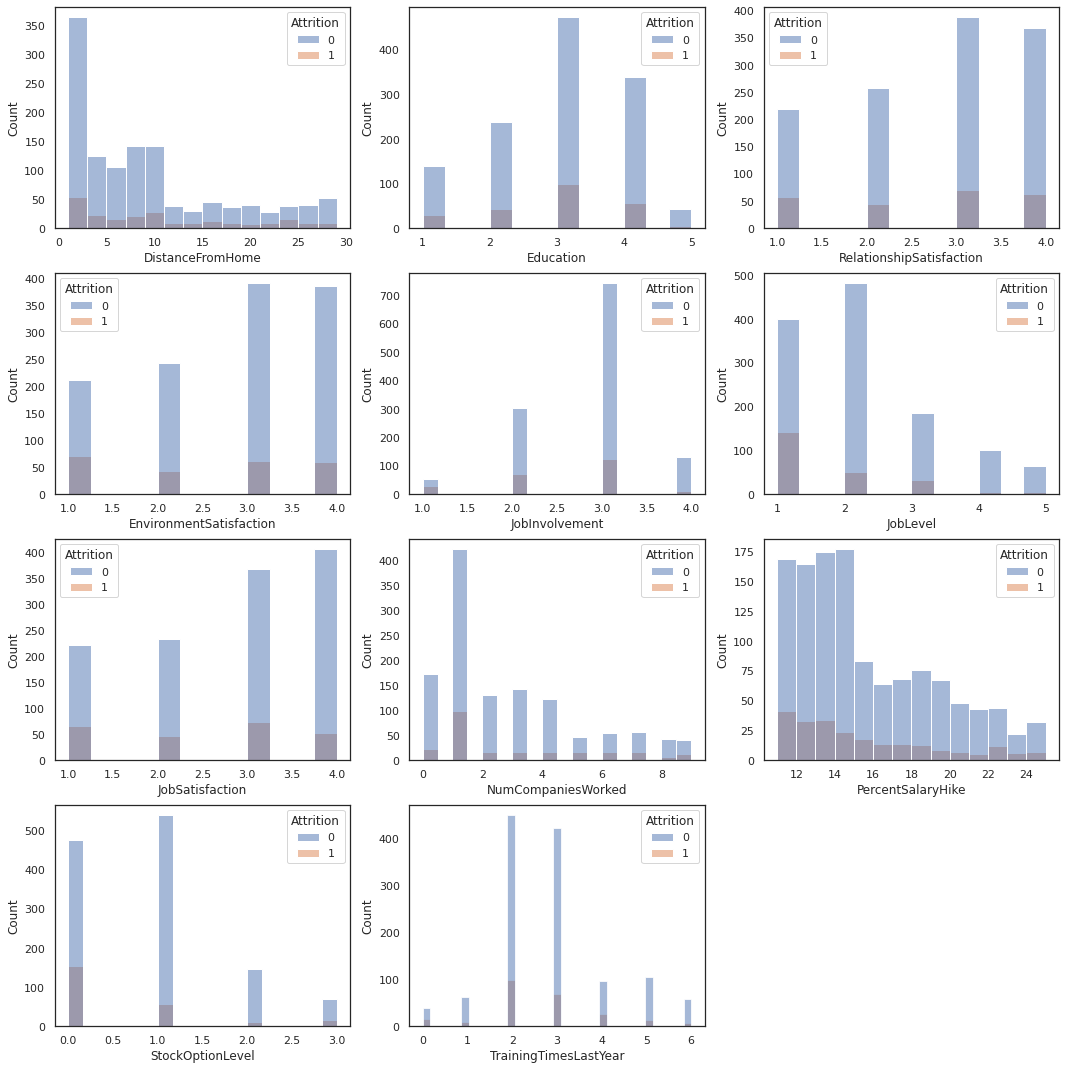

In [ ]:
sns.set(style='white', color_codes=True)

def trim_axs(axs, n):
    axs = axs.flat
    for ax in axs[n:]:
        ax.remove()
    return axs[:n]

cols = [
    'DistanceFromHome', 'Education', 'RelationshipSatisfaction',
    'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
    'StockOptionLevel', 'TrainingTimesLastYear'
]

fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = trim_axs(axes, len(cols))
for col_name, ax in zip(cols, axes):
    sns.histplot(x=col_name, hue='Attrition', data=df, ax=ax, alpha=0.5)
plt.subplots_adjust(bottom=-0.3)

Похоже, что переменные `EnvironmentSatisfaction`, `JobSatisfaction`, `PerformanceRating` и `RelationshipSatisfaction` не оказывают большого влияния на увольнение сотрудников.

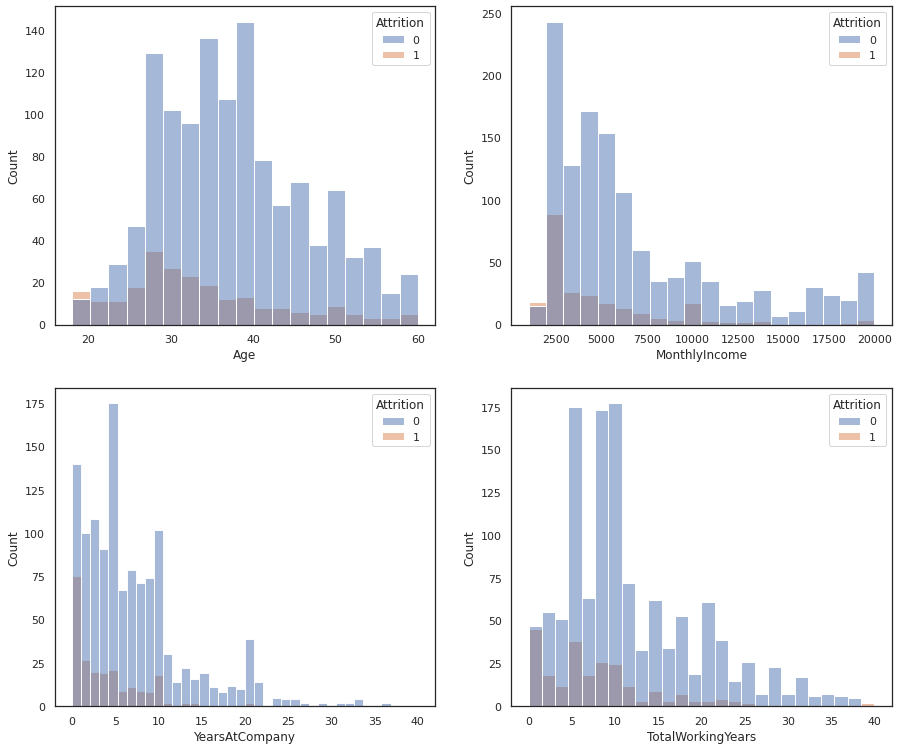

In [ ]:
cols = [
    'Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears'
]

fig, axes = plt.subplots(2,2, figsize=(15, 9))
axes = trim_axs(axes, len(cols))
for col_name, ax in zip(cols, axes):
    sns.histplot(x=col_name, hue='Attrition', data=df, ax=ax, alpha=0.5)
plt.subplots_adjust(bottom=-0.2)

### Выводы

- Работники с низким значением `JobLevel`, `MonthlyIncome`, `YearAtCompany` и `TotalWorkingYears` с большей вероятностью уволятся с работы.
- `BusinessTravel`: сотрудники, которые много путешествуют, чаще увольняются, чем другие сотрудники.

- `Department`: работник отдела «Исследования и разработки» с большей вероятностью останется, чем работники другого отдела.

- `EducationField`: работники с `Human Resources` и `Technical Degree` с большей вероятностью уволятся, чем работники с другим образованием.

- `Gender`: Мужчины более склонны к смене работы.

- `JobRole`: работники `Laboratory Technician`, `Sales Representative` и `HR` уволятся с большей вероятностью.

- `MaritalStatus`: работники с семейным положением «Холостяк» с большей вероятностью уволятся чем женатые и разведенные.

- `OverTime`: рабочие, которые работают больше часов более склонны к смене работы чем другие.

### Анализ взаимосвязей

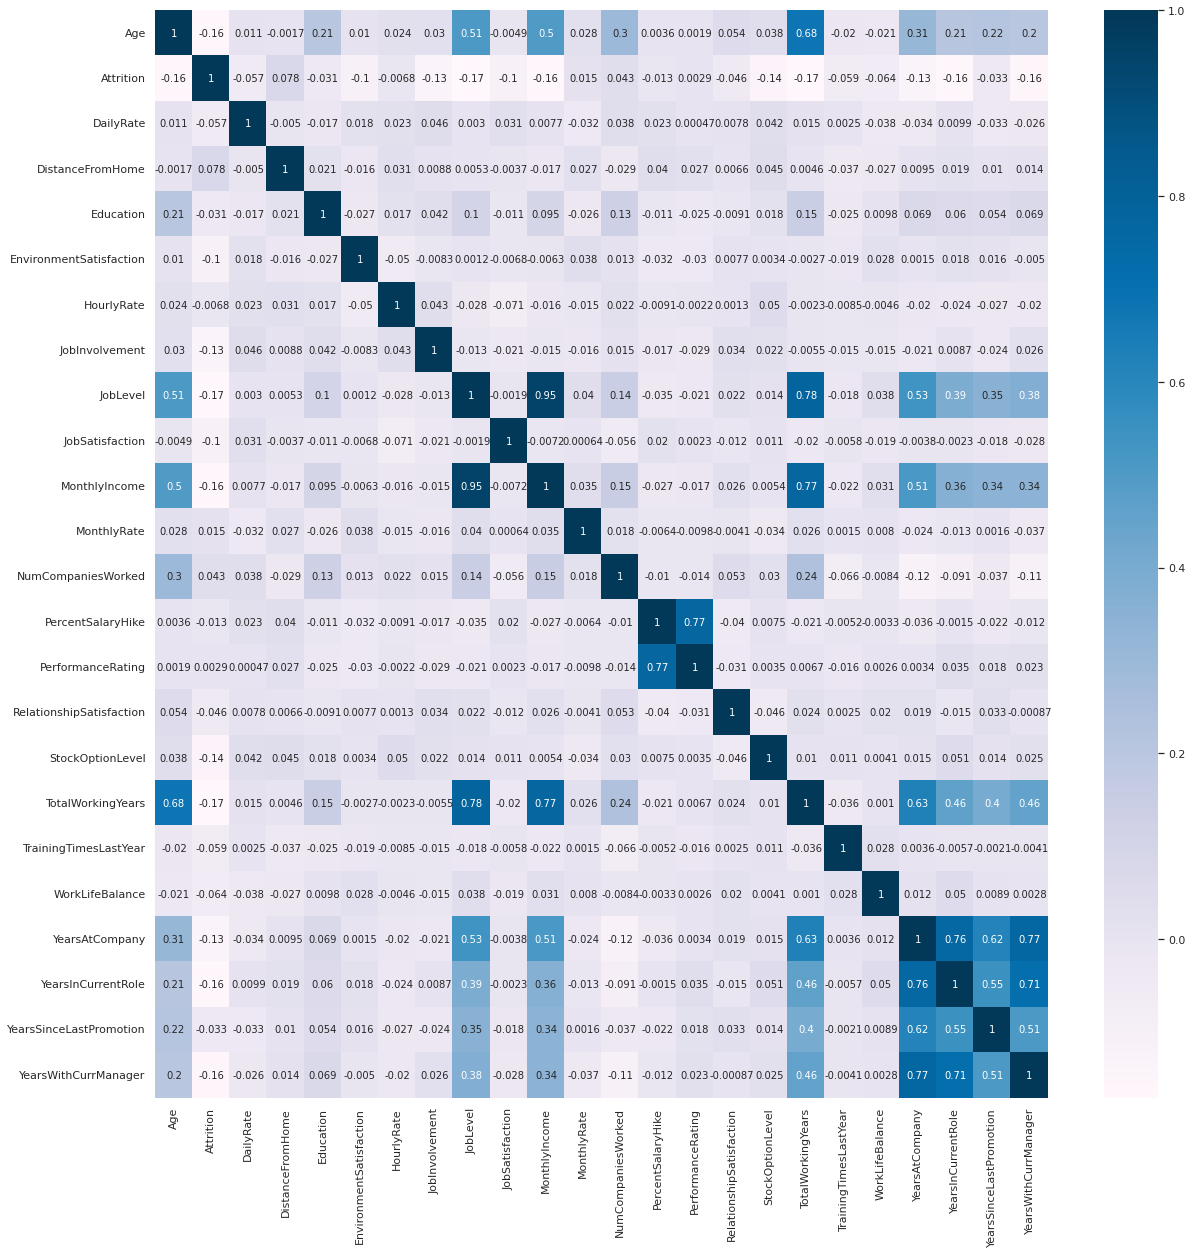

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),
            annot=True,
            cmap="PuBu",
            annot_kws={"size":10});

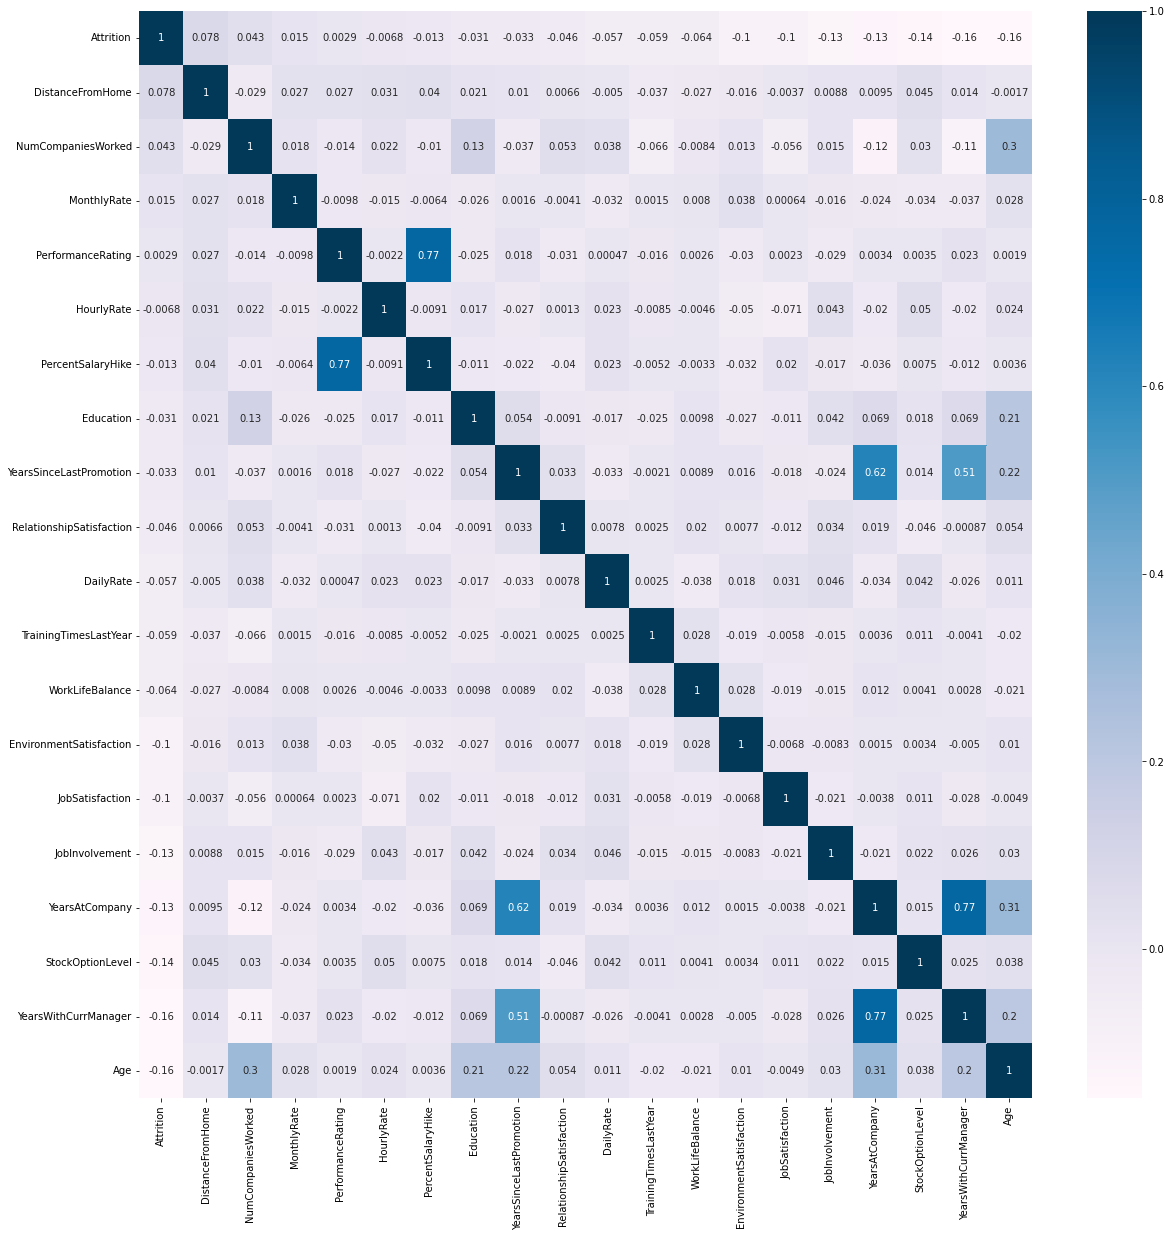

In [ ]:
col = df.corr(numeric_only=True).nlargest(20, 'Attrition')['Attrition'].index
plt.figure(figsize=(20,20))
sns.heatmap(df[col].corr(numeric_only=True),
            annot=True,
            cmap="PuBu",
            annot_kws={"size":10});

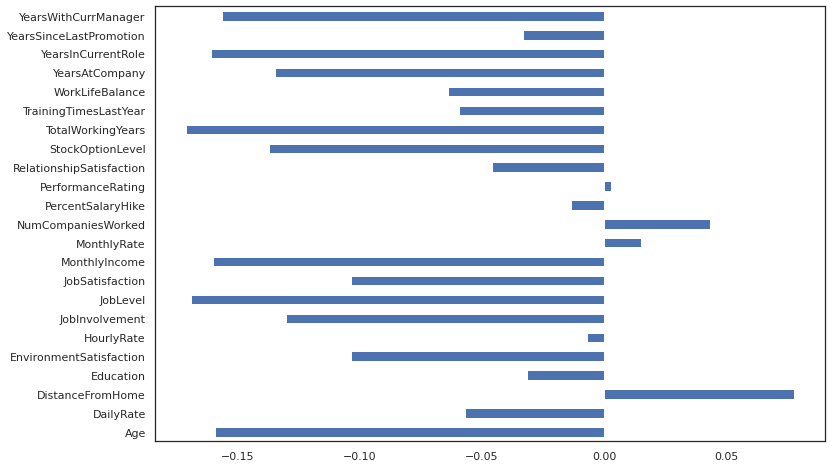

In [ ]:
df.drop('Attrition', axis=1).corrwith(df['Attrition']).plot.barh(figsize=(12,8));

### Анализ результатов взаимосвязей
- Ежемесячный доход сильно коррелирует с уровнем работы.
- Уровень работы сильно коррелирует с общим рабочим временем.
- Ежемесячный доход сильно коррелирует с общим количеством рабочих часов.
- Возраст также положительно коррелирует с общим рабочим временем.

## Обработка данных

In [ ]:
dummy_col = df.columns[df.nunique() < 20].drop('Attrition')
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [ ]:
data = data.T.drop_duplicates().T
data.drop_duplicates(inplace=True)

data.shape

(1470, 136)

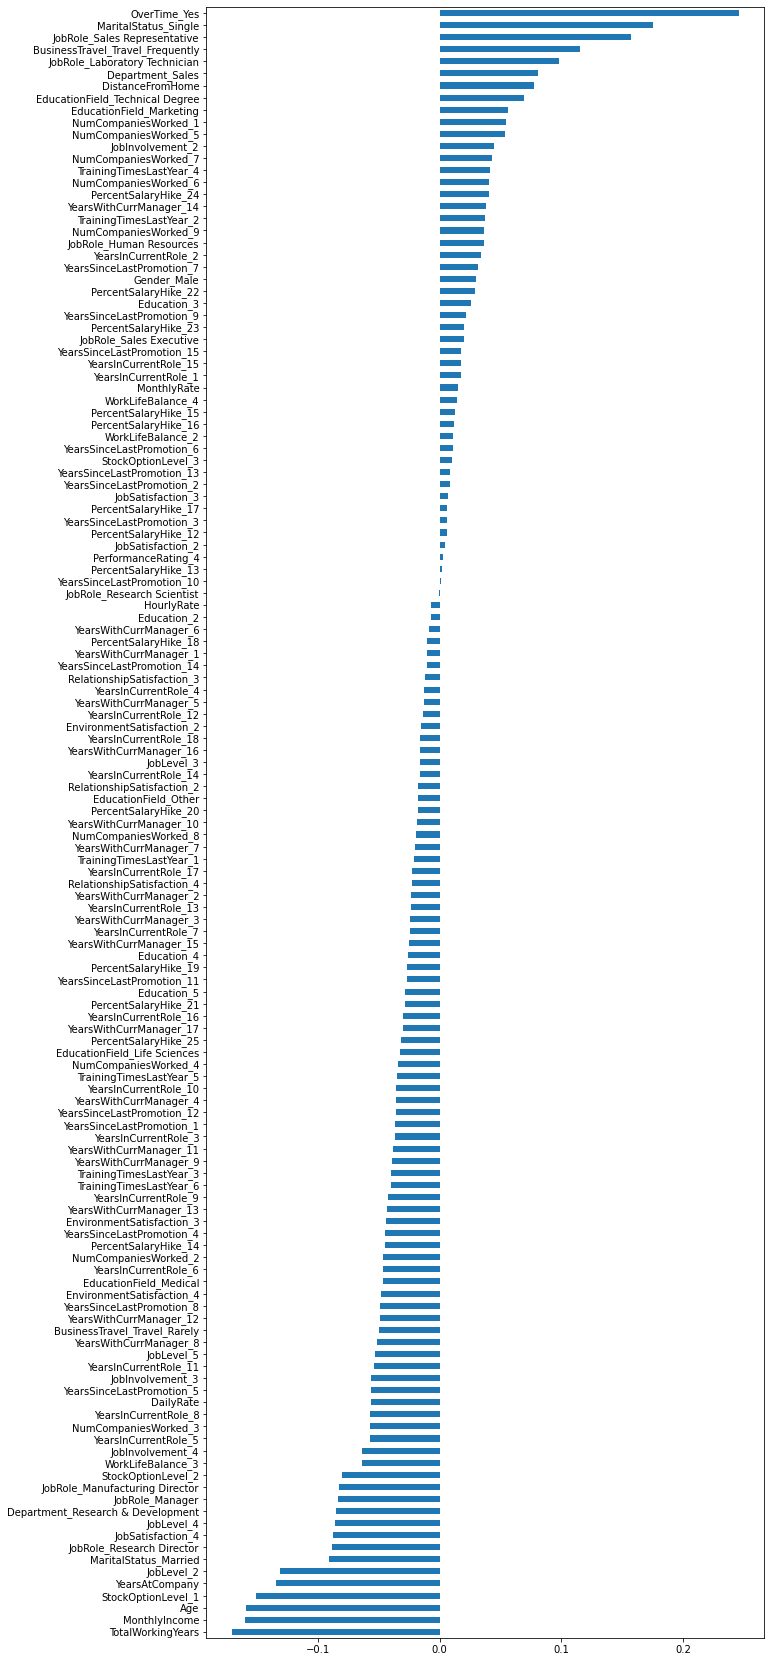

In [ ]:
data.drop('Attrition', axis=1).corrwith(data['Attrition']) \
    .sort_values().plot(kind='barh', figsize=(10, 30));

In [ ]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data['Attrition'])
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index

## Машинное обучение

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#X = data.drop('Attrition', axis=1)
#y = data['Attrition']
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#X_scaled = scaler.transform(X)

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, df.drop('Attrition', axis=1).columns.drop(dummy_col)),
    ('cat', categorical_transformer, dummy_col)
])

In [ ]:
def feature_importance(columns, model):
    features = pd.DataFrame({'feature': columns,
                             'importance':  model.feature_importances_})
    return features.sort_values(by='importance', ascending=False)

### Что определяет успех?
У нас несбалансированные данные, поэтому, если мы предскажем, что все наши сотрудники останутся, мы получим точность 84%.


In [ ]:
pd.concat([y_test.value_counts() / y_test.shape[0],
           y_train.value_counts() / y_train.shape[0]],
          axis=1, keys=['Train', 'Test'])

,Train,Test
0,0.839002,0.838678
1,0.160998,0.161322


In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, classification_report, roc_auc_score)

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = classification_report(y_train, y_train_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"OVERALL PRESISION: {precision_score(y_train, y_train_pred):.4f}")
    print(f"OVERALL RECALL: {recall_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = classification_report(y_test, y_test_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"OVERALL PRESISION: {precision_score(y_test, y_test_pred):.4f}")
    print(f"OVERALL RECALL: {recall_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

reg = 0.01
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logregressor', LogisticRegression(C=1/reg, solver='liblinear', penalty='l1'))
])
lr = pipeline.fit(X_train, y_train)
#lr = LogisticRegression(C=1/reg, solver='liblinear', penalty='l1')
#lr.fit(X_train_scaled, y_train)

evaluate(lr, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[843  20]
 [ 47 119]]
ACCURACY SCORE: 0.9349
OVERALL PRESISION: 0.8561
OVERALL RECALL: 0.7169
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       863
           1       0.86      0.72      0.78       166

    accuracy                           0.93      1029
   macro avg       0.90      0.85      0.87      1029
weighted avg       0.93      0.93      0.93      1029

TESTING RESULTS: 
CONFUSION MATRIX:
[[343  27]
 [ 40  31]]
ACCURACY SCORE: 0.8481
OVERALL PRESISION: 0.5345
OVERALL RECALL: 0.4366
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       370
           1       0.53      0.44      0.48        71

    accuracy                           0.85       441
   macro avg       0.72      0.68      0.70       441
weighted avg       0.84      0.85      0.84       441



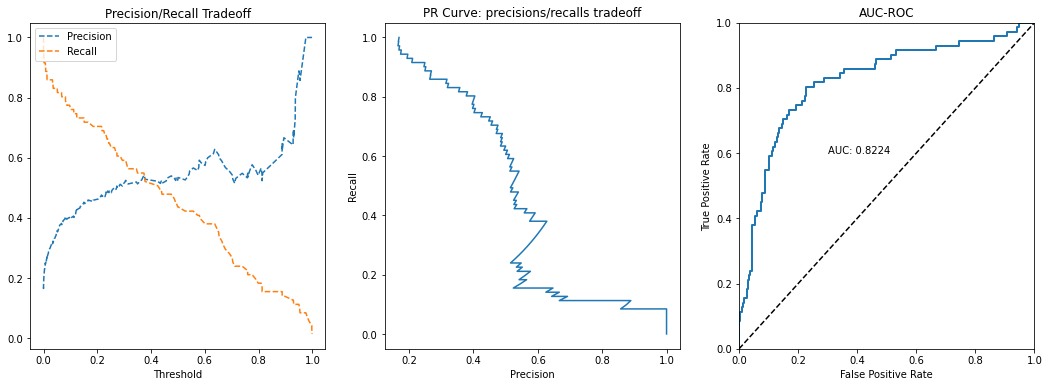

In [51]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], linestyle='dashed', label='Precision')
    plt.plot(thresholds, recalls[:-1], linestyle='dashed', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.title('Precision/Recall Tradeoff')
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.text(0.3, 0.6, f'AUC: {auc(fpr, tpr):.4f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC')
    
def plot_curves(model, y_test, X_test):
    precisions, recalls, thresholds = precision_recall_curve(
        y_test, model.predict_proba(X_test)[:,1]
    )
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

    plt.subplot(1, 3, 2)
    plt.plot(precisions, recalls)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('PR Curve: precisions/recalls tradeoff')

    plt.subplot(1, 3, 3)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plot_roc_curve(fpr, tpr)
  
plot_curves(lr, y_test, X_test)

In [52]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]),
        'Test': roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]),
    },
}

In [ ]:
def calculate_tpr_fpr(prediction, actual):
    prediction_true = np.equal(prediction, 1)
    prediction_false = np.equal(prediction, 0)

    actual_true = np.equal(actual, 1)
    actual_false = np.equal(actual, 0)

    # Calculate TP, TN, FP, and FN
    # The combination of sum and '&' counts the overlap
    # For example, TP calculates how many 'true' predictions 
    # overlapped with 'true' labels (correct answers)
    TP = np.sum(prediction_true  & actual_true)
    TN = np.sum(prediction_false & actual_false)
    FP = np.sum(prediction_true  & actual_false)
    FN = np.sum(prediction_false & actual_true)

    # Calculate the true positive rate
    tpr = TP / (TP + FN)
    # Calculate the false positive rate 
    fpr = FP / (FP + TN)

    return tpr, fpr


def assess_model(model_predict, X_test, y_test, threshold):
    probability = model_predict(X_test)
    predicted = probability > threshold

    return calculate_tpr_fpr(predicted, y_test)


def create_roc_curve(model_predict, X_test, y_test):
    thresholds = np.sort(np.hstack([[1.0001], [0.5], [0.3], np.linspace(0,1,100)]))

    false_positive_rates = []
    true_positive_rates = []

    for threshold in thresholds:
        tpr, fpr = assess_model(model_predict, X_test, y_test, threshold)
        true_positive_rates.append(tpr)
        false_positive_rates.append(fpr)

    df = pd.DataFrame(dict(threshold=thresholds,
                           fpr=false_positive_rates,
                           tpr=true_positive_rates))

    return df

#### Пороговые значения

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
scores = tpr - fpr

index_of_best_score = np.argmax(scores)
best_threshold = thresholds[index_of_best_score]
print('Best threshold:', best_threshold)

print('TPR at this threshold:', tpr[index_of_best_score])
print('FPR at this threshold:', fpr[index_of_best_score])

Best threshold: 0.08169463735563146
TPR at this threshold: 0.8028169014084507
FPR at this threshold: 0.22702702702702704


In [54]:
print(classification_report(
      y_test, lr.predict_proba(X_test)[:,1] >= best_threshold
))
print(
    f"AUC: " 
    f"{roc_auc_score(y_test, lr.predict_proba(X_test)[:,1] >= best_threshold)}"
)

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       370
           1       0.40      0.80      0.54        71

    accuracy                           0.78       441
   macro avg       0.68      0.79      0.70       441
weighted avg       0.86      0.78      0.80       441

AUC: 0.7878949371907119


При использовании найденного порога, полнота (Recall) и $\text{F1-score}$ для метки «1» возрастает, то есть увеличивается процент правильно определенных моделью меток, среди меток, которые должны быть правильно прогнозируемы. Мы лучше находим склонных к увольнению при небольшой потере в метриках Accuracy и AUC. 



### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('randomforest', RandomForestClassifier(n_estimators=100))])

rf = pipeline.fit(X_train, y_train)

#rf = RandomForestClassifier(n_estimators=100)
#rf.fit(X_train, y_train)
evaluate(rf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE: 1.0000
OVERALL PRESISION: 1.0000
OVERALL RECALL: 1.0000
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029

TESTING RESULTS: 
CONFUSION MATRIX:
[[362   8]
 [ 63   8]]
ACCURACY SCORE: 0.8390
OVERALL PRESISION: 0.5000
OVERALL RECALL: 0.1127
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.50      0.11      0.18        71

    accuracy                           0.84       441
   macro avg       0.68      0.55      0.55       441
weighted avg       0.80      0.84      0.79       441



In [56]:
param_grid = dict(
    randomforest__n_estimators = [50, 100, 500, 1000], 
    randomforest__max_features = ['auto', 'sqrt'],
    randomforest__max_depth = [2, 3, 5, 8, 12, 15, 18, None], 
    randomforest__min_samples_split = [2, 5, 7],
    randomforest__min_samples_leaf = [1, 2, 3], 
    randomforest__bootstrap = [True, False]
)

rf_clf = pipeline.fit(X_train, y_train)
search = GridSearchCV(rf_clf, param_grid=param_grid,
                      scoring='roc_auc', cv=5,
                      verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

#rf_clf = search(**search.best_params_, random_state=42)
#rf_clf.fit(X_train, y_train)
evaluate(search, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE: 1.0000
OVERALL PRESISION: 1.0000
OVERALL RECALL: 1.0000
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029

TESTING RESULTS: 
CONFUSION MATRIX:
[[363   7]
 [ 62   9]]
ACCURACY SCORE: 0.8435
OVERALL PRESISION: 0.5625
OVERALL RECALL: 0.1268
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.56      0.13      0.21        71

    accuracy                           0.84       441
   macro avg       0.71      0.55      0.56       441
weighted avg       0.81     

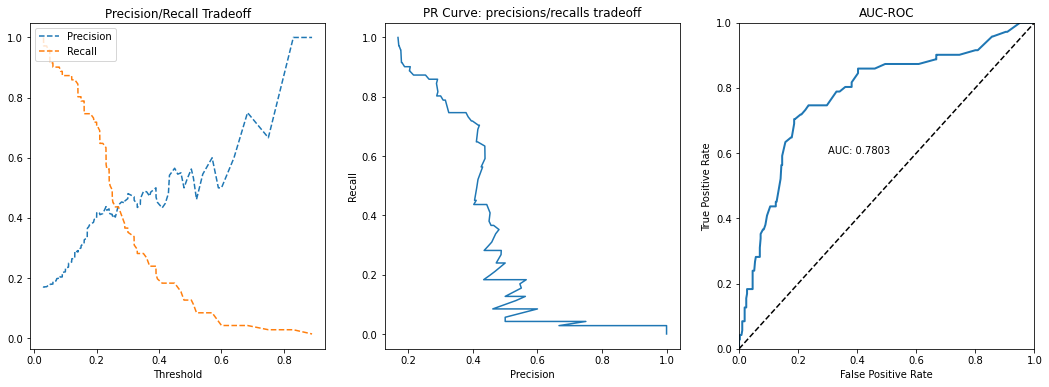

In [57]:
plot_curves(search, y_test, X_test)

In [67]:
scores_dict['Random Forest'] = {
    'Train': roc_auc_score(y_train, search.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, search.predict_proba(X_test)[:,1])
}

#### Важность переменных

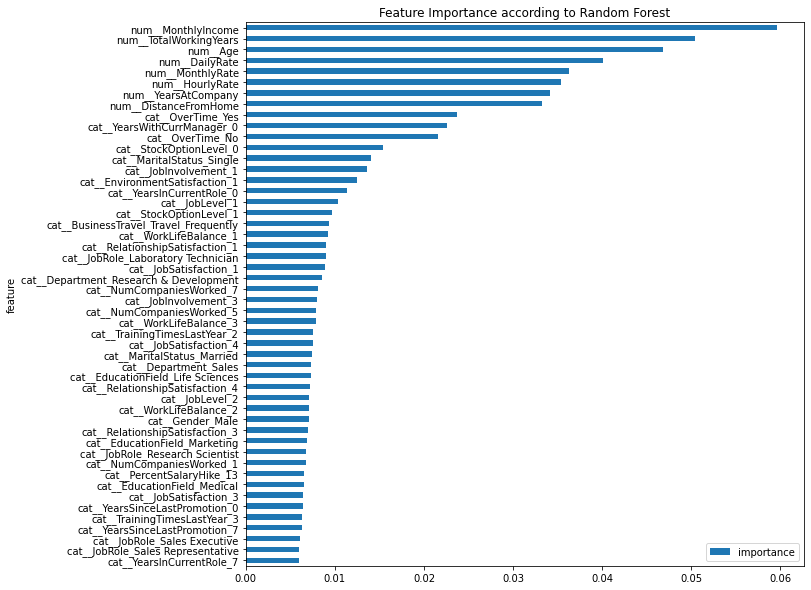

In [59]:
fi = feature_importance(rf_clf[:-1].get_feature_names_out(),
                        search.best_estimator_._final_estimator)[:50]
fi.set_index('feature', inplace=True)
fi.plot(kind='barh', figsize=(10, 10))
plt.gca().invert_yaxis()
plt.title('Feature Importance according to Random Forest');

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

#svm_clf = SVC(kernel='linear', probability=True)
#svm_clf.fit(X_train, y_train)

pipeline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('svm', SVC(kernel='linear', probability=True))]
)

svm_clf = pipeline.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[854   9]
 [ 54 112]]
ACCURACY SCORE: 0.9388
OVERALL PRESISION: 0.9256
OVERALL RECALL: 0.6747
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       863
           1       0.93      0.67      0.78       166

    accuracy                           0.94      1029
   macro avg       0.93      0.83      0.87      1029
weighted avg       0.94      0.94      0.93      1029

TESTING RESULTS: 
CONFUSION MATRIX:
[[349  21]
 [ 45  26]]
ACCURACY SCORE: 0.8503
OVERALL PRESISION: 0.5532
OVERALL RECALL: 0.3662
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       370
           1       0.55      0.37      0.44        71

    accuracy                           0.85       441
   macro avg       0.72      0.65      0.68       441
weighted avg       0.83      0.85      0.84       441



In [ ]:
#svm_clf = SVC(random_state=42)

param_grid = [
    {'svm__C': [1, 10, 100, 1000],
     'svm__kernel': ['linear']},
    {'svm__C': [1, 10, 100, 1000],
     'svm__gamma': [0.01, 0.001, 0.0001],
     'svm__kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid,
                      scoring='roc_auc', cv=5,
                      refit=True, verbose=1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='...
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkL

In [ ]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('svm', SVC(**{'C': 1, 'gamma': 1e-4, 'kernel': 'linear'}, probability=True))
    ]
)

svm_clf = pipeline.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[854   9]
 [ 54 112]]
ACCURACY SCORE: 0.9388
OVERALL PRESISION: 0.9256
OVERALL RECALL: 0.6747
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       863
           1       0.93      0.67      0.78       166

    accuracy                           0.94      1029
   macro avg       0.93      0.83      0.87      1029
weighted avg       0.94      0.94      0.93      1029

TESTING RESULTS: 
CONFUSION MATRIX:
[[349  21]
 [ 45  26]]
ACCURACY SCORE: 0.8503
OVERALL PRESISION: 0.5532
OVERALL RECALL: 0.3662
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       370
           1       0.55      0.37      0.44        71

    accuracy                           0.85       441
   macro avg       0.72      0.65      0.68       441
weighted avg       0.83      0.85      0.84       441



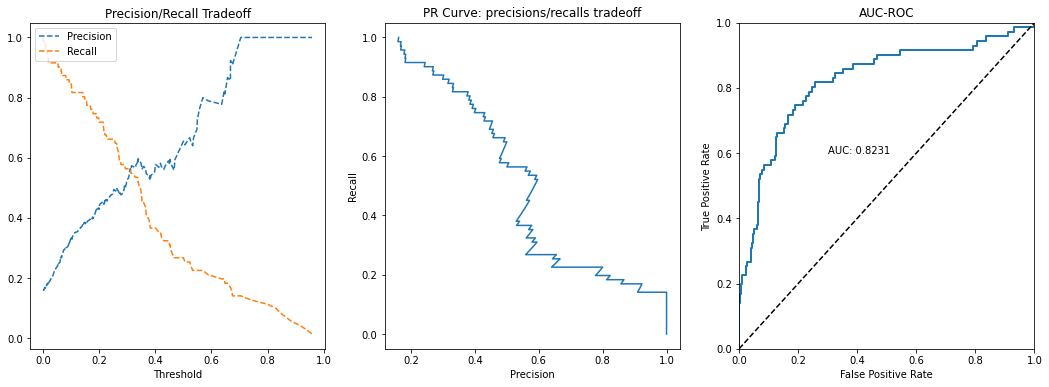

In [ ]:
plot_curves(svm_clf, y_test, X_test)

In [69]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict_proba(X_train)[:,1]),
        'Test': roc_auc_score(y_test, svm_clf.predict_proba(X_test)[:,1]),
}

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# xgb_clf = XGBClassifier(use_label_encoder=False)
# xgb_clf.fit(X_train, y_train)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('xgb', XGBClassifier(use_label_encoder=False))
    ]
)

xgb_clf = pipeline.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[862   1]
 [ 51 115]]
ACCURACY SCORE: 0.9495
OVERALL PRESISION: 0.9914
OVERALL RECALL: 0.6928
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       863
           1       0.99      0.69      0.82       166

    accuracy                           0.95      1029
   macro avg       0.97      0.85      0.89      1029
weighted avg       0.95      0.95      0.95      1029

TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 55  16]]
ACCURACY SCORE: 0.8549
OVERALL PRESISION: 0.6400
OVERALL RECALL: 0.2254
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       370
           1       0.64      0.23      0.33        71

    accuracy                           0.85       441
   macro avg       0.75      0.60      0.63       441
weighted avg       0.83      0.85      0.82       441



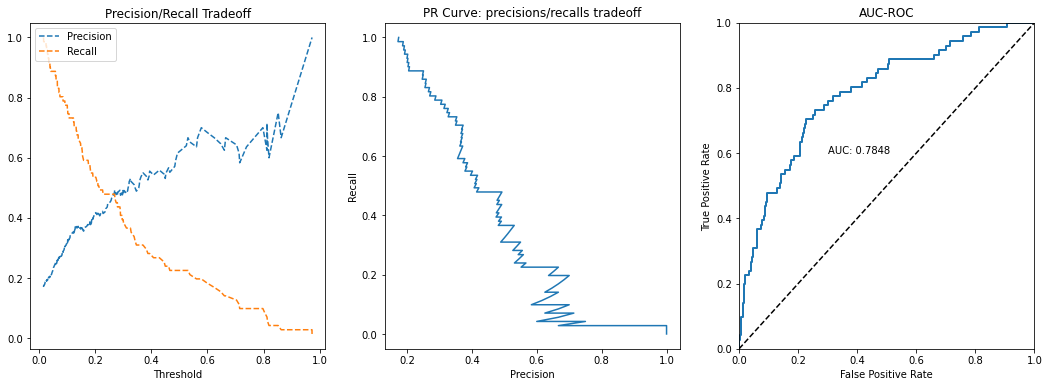

In [ ]:
plot_curves(xgb_clf, y_test, X_test)

In [66]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:,1]),
        'Test': roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1]),
    }

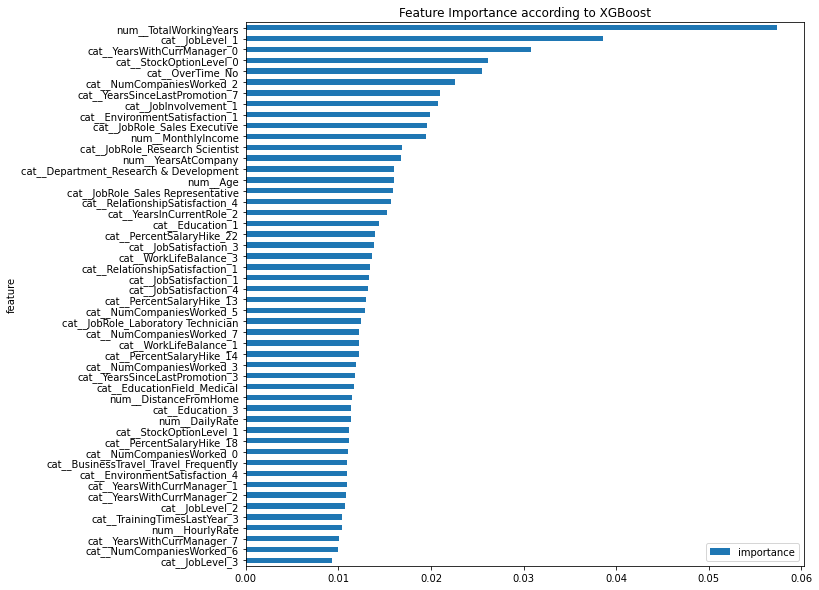

In [ ]:
fi = feature_importance(xgb_clf[:-1].get_feature_names_out(),
                        xgb_clf._final_estimator)[:50]
fi.set_index('feature', inplace=True)
fi.plot(kind='barh', figsize=(10, 10))
plt.gca().invert_yaxis()
plt.title('Feature Importance according to XGBoost');

### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

# lgb_clf = LGBMClassifier()
# lgb_clf.fit(X_train, y_train)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lgb', LGBMClassifier())
    ]
)

lgb_clf = pipeline.fit(X_train, y_train)

evaluate(lgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE: 1.0000
OVERALL PRESISION: 1.0000
OVERALL RECALL: 1.0000
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029

TESTING RESULTS: 
CONFUSION MATRIX:
[[358  12]
 [ 58  13]]
ACCURACY SCORE: 0.8413
OVERALL PRESISION: 0.5200
OVERALL RECALL: 0.1831
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       370
           1       0.52      0.18      0.27        71

    accuracy                           0.84       441
   macro avg       0.69      0.58      0.59       441
weighted avg       0.81      0.84      0.81       441



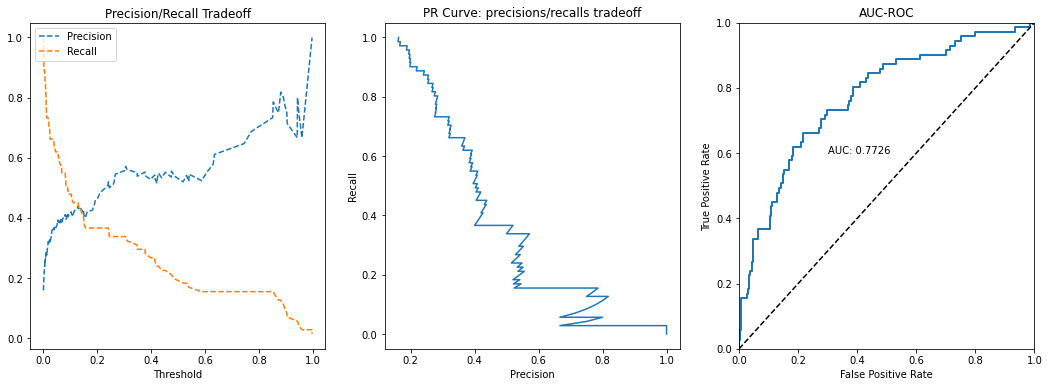

In [ ]:
plot_curves(lgb_clf, y_test, X_test)

In [65]:
scores_dict['LightGBM'] = {
        'Train': roc_auc_score(y_train, lgb_clf.predict_proba(X_train)[:,1]),
        'Test': roc_auc_score(y_test, lgb_clf.predict_proba(X_test)[:,1]),
    }

### CatBoost

In [64]:
# !pip install catboost

In [ ]:
from catboost import CatBoostClassifier

# cb_clf = CatBoostClassifier()
# cb_clf.fit(X_train, y_train, verbose=0)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('cb', CatBoostClassifier(verbose=0))
    ]
)

cb_clf = pipeline.fit(X_train, y_train)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 14 152]]
ACCURACY SCORE: 0.9864
OVERALL PRESISION: 1.0000
OVERALL RECALL: 0.9157
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       863
           1       1.00      0.92      0.96       166

    accuracy                           0.99      1029
   macro avg       0.99      0.96      0.97      1029
weighted avg       0.99      0.99      0.99      1029

TESTING RESULTS: 
CONFUSION MATRIX:
[[363   7]
 [ 59  12]]
ACCURACY SCORE: 0.8503
OVERALL PRESISION: 0.6316
OVERALL RECALL: 0.1690
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       370
           1       0.63      0.17      0.27        71

    accuracy                           0.85       441
   macro avg       0.75      0.58      0.59       441
weighted avg       0.82      0.85      0.81       441



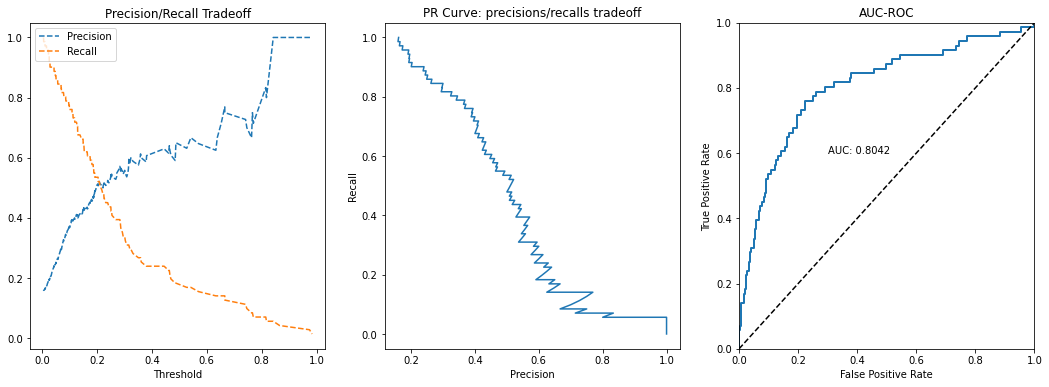

In [ ]:
plot_curves(cb_clf, y_test, X_test)

In [63]:
scores_dict['CatBoost'] = {
        'Train': roc_auc_score(y_train, cb_clf.predict_proba(X_train)[:,1]),
        'Test': roc_auc_score(y_test, cb_clf.predict_proba(X_test)[:,1]),
    }

### AdaBoost

In [47]:
from sklearn.ensemble import AdaBoostClassifier

# ab_clf = AdaBoostClassifier()
# ab_clf.fit(X_train, y_train)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('ab', AdaBoostClassifier())
    ]
)

ab_clf = pipeline.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[842  21]
 [ 77  89]]
ACCURACY SCORE: 0.9048
OVERALL PRESISION: 0.8091
OVERALL RECALL: 0.5361
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       863
           1       0.81      0.54      0.64       166

    accuracy                           0.90      1029
   macro avg       0.86      0.76      0.79      1029
weighted avg       0.90      0.90      0.90      1029

TESTING RESULTS: 
CONFUSION MATRIX:
[[351  19]
 [ 50  21]]
ACCURACY SCORE: 0.8435
OVERALL PRESISION: 0.5250
OVERALL RECALL: 0.2958
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.53      0.30      0.38        71

    accuracy                           0.84       441
   macro avg       0.70      0.62      0.64       441
weighted avg       0.82      0.84      0.82       441



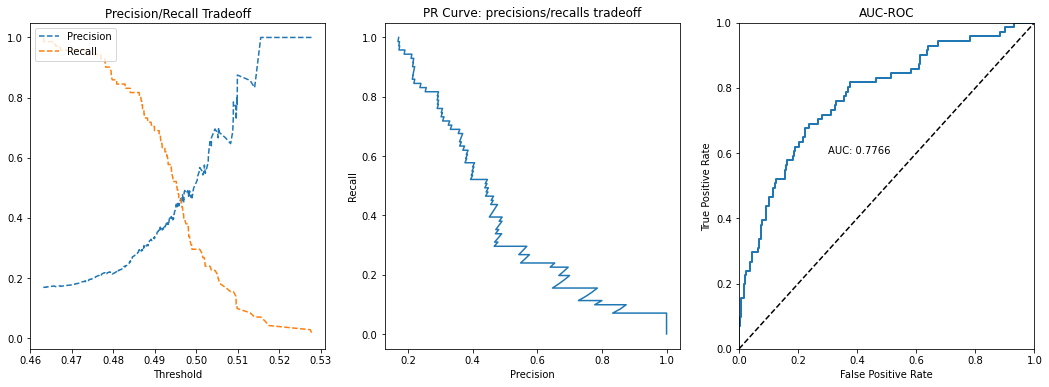

In [48]:
plot_curves(ab_clf, y_test, X_test)

In [61]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict_proba(X_train)[:,1]),
        'Test': roc_auc_score(y_test, ab_clf.predict_proba(X_test)[:,1]),
    }

## Сравнение моделей

In [77]:
compare = pd.DataFrame(scores_dict).T
compare

,Train,Test
Logistic Regression,0.942181,0.822383
Random Forest,1.000000,0.780263
AdaBoost,0.935243,0.776589
CatBoost,0.999714,0.804225
LightGBM,1.000000,0.772630
XGBoost,0.983791,0.784774
Support Vector Machine,0.912186,0.823144


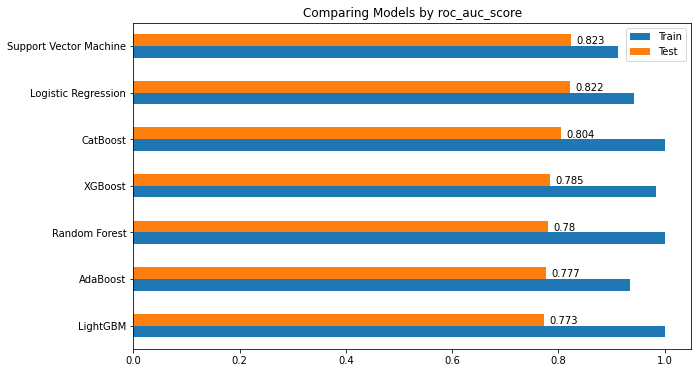

In [90]:
compare.sort_values('Test').plot.barh(figsize=(10,6))
for index, value in enumerate(compare['Test'].sort_values()):
    plt.text(value+0.01, index, str(round(value, 3)), verticalalignment='bottom')
plt.title('Comparing Models by roc_auc_score')
plt.show();

## Заключение

Мы узнали, как разработать модель машинного обучения для прогнозирования увольнения сотрудников в организации. Использовались различные алгоритмы машинного обучения, которые показали приблизительно одинаковые результаты. Выделить можно SVM и логистическую регрессию. Улучшить результативность моделей можно:
- расширить тестовый набор данных;
- проработать переменные;
- использовать оптимальное пороговое значение при прогнозировании, как это было в примере с логистической регрессией.